## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'G:/kaggle/Tomato pata/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = 'G:/kaggle/Tomato pata/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('G:/kaggle/Tomato pata/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set), 
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4587 steps, validate for 1147 steps
Epoch 1/10
4586/4587 [============================>.] - ETA: 0s - loss: 8.0319 - accuracy: 0.5446

In [15]:


# Place tensors on the CPU
with tf.device('/GPU:0'):
    r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set), 
    validation_steps=len(test_set)
)
    

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4587 steps, validate for 1147 steps
Epoch 1/10
4587/4587 [==============================] - 391s 85ms/step - loss: 7.9592 - accuracy: 0.5467 - val_loss: 21.9620 - val_accuracy: 0.4046
Epoch 2/10
4587/4587 [==============================] - 306s 67ms/step - loss: 8.0820 - accuracy: 0.6561 - val_loss: 44.0942 - val_accuracy: 0.3128
Epoch 3/10
4587/4587 [==============================] - 291s 63ms/step - loss: 7.9072 - accuracy: 0.6940 - val_loss: 22.8465 - val_accuracy: 0.4859
Epoch 4/10
4587/4587 [==============================] - 294s 64ms/step - loss: 7.8185 - accuracy: 0.7171 - val_loss: 17.7716 - val_accuracy: 0.5479
Epoch 5/10
4587/4587 [==============================] - 312s 68ms/step - loss: 8.0794 - accuracy: 0.7270 - val_loss: 28.5645 - val_accuracy: 0.4497
Epoch 6/10
4587/4587 [==============================] - 301s 66ms/step - loss: 7.9429 - 

In [16]:
import matplotlib.pyplot as plt

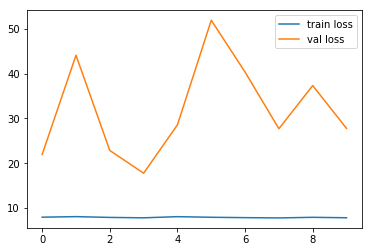

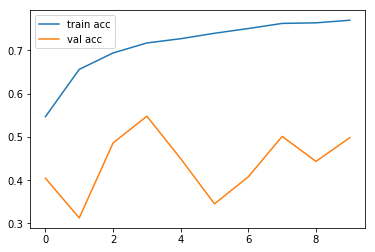

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('G:/kaggle/Tomato pata/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/model_inception.h5')

In [34]:

y_pred = model.predict(test_set)


In [28]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.7927403e-20, 3.3191942e-08, ..., 0.0000000e+00,
        0.0000000e+00, 4.3215510e-32],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.0123712e-34, 6.3678645e-16, ..., 0.0000000e+00,
        0.0000000e+00, 2.6958050e-34],
       [1.1341454e-03, 2.6109253e-31, 2.1986391e-06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([8, 0, 4, ..., 5, 4, 4], dtype=int64)

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model=load_model('G:/kaggle/Tomato pata/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/model_inception.h5')

In [40]:
img_data

NameError: name 'img_data' is not defined

In [42]:
img=image.load_img('C:/Users/Boishakhi/Downloads/download.jpg',target_size=(224,224))



In [43]:
x=image.img_to_array(img)
x

array([[[116., 110.,  96.],
        [121., 115., 101.],
        [121., 118., 103.],
        ...,
        [171., 143., 142.],
        [168., 140., 139.],
        [163., 135., 134.]],

       [[116., 110.,  96.],
        [118., 115., 100.],
        [120., 117., 102.],
        ...,
        [159., 131., 130.],
        [156., 128., 127.],
        [152., 124., 123.]],

       [[114., 111.,  96.],
        [116., 113.,  98.],
        [117., 114.,  99.],
        ...,
        [160., 134., 133.],
        [157., 131., 130.],
        [153., 127., 126.]],

       ...,

       [[102.,  61.,  65.],
        [114.,  73.,  77.],
        [127.,  86.,  90.],
        ...,
        [ 93.,  64.,  69.],
        [ 90.,  61.,  66.],
        [ 85.,  56.,  61.]],

       [[101.,  65.,  67.],
        [101.,  65.,  67.],
        [103.,  67.,  69.],
        ...,
        [ 95.,  64.,  72.],
        [ 93.,  62.,  70.],
        [ 90.,  59.,  67.]],

       [[100.,  64.,  66.],
        [101.,  65.,  67.],
        [103.,  

In [44]:
x.shape

(224, 224, 3)

In [45]:
x=x/255

In [46]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

array([[7.9517680e-16, 3.5324845e-14, 1.0000000e+00, 1.7842488e-17,
        2.7201509e-21, 0.0000000e+00, 1.6221043e-27, 1.2632298e-25,
        1.3154998e-28, 0.0000000e+00]], dtype=float32)

In [48]:
a=np.argmax(model.predict(img_data), axis=1)

In [49]:
a==1

array([False])

In [50]:
import tensorflow as tf

In [51]:
tf.__version__

'2.1.0'